In [3]:
import numpy as np
import pandas as pd
import json
import re
import jieba

from gensim.models import Word2Vec
import gensim
#import multiprocessing
from gensim.corpora.dictionary import Dictionary

from sklearn.model_selection import train_test_split
from keras.regularizers import l2

from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Embedding,Dropout,Activation,Softmax,Flatten,Conv1D, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud

from sklearn.linear_model import LinearRegression
import econtools.metrics as mt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 1200
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams['font.family'] = ['Heiti TC']

## 处理申请数据

## 2014

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2014.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2014.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app = df_app[df_app['资助类别']=='青年科学基金项目']
#df_app.head()


In [ ]:
df_app.groupby(['资助类别'])["立项"].mean()

In [ ]:
df_14 = df_app

### 2015

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2015.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2015.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
print(df_app.groupby(['资助类别'])["立项"].mean())
df_app = df_app[df_app['资助类别']=='青年科学基金项目']


In [ ]:
df_15 = df_app

### 2016

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2016.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5','Unnamed: 7','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2016.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
df_app = df_app[df_app['资助类别']=='青年科学基金项目']
df_app.groupby(['资助类别'])["立项"].mean()

In [ ]:
df_16 = df_app

### 2017

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2017.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2017.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
df_app = df_app[df_app['资助类别']=='青年科学基金项目']
df_app.groupby(['资助类别'])["立项"].mean()


In [ ]:
df_17 = df_app

### 2018

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2018.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2018.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
df_app = df_app[df_app['资助类别']=='青年科学基金项目']


In [ ]:
df_18 = df_app

### 2019

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2019.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2019.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
df_app = df_app[df_app['资助类别']=='青年科学基金项目']
df_app.groupby(['资助类别'])["立项"].mean()


In [ ]:
df_19 = df_app

### 2020

In [ ]:
# 申请数据
apps = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2020.xlsx",sheet_name = "申请")
apps.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8','项目名称2','姓名','申请单位'],inplace=True)
apps_comments = apps["反馈评议意见"].str.split("<", expand = True)
df_app = pd.merge(apps, apps_comments, left_index=True, right_index=True)
df_app.drop(columns=0,inplace=True)
df_app.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5",6: "意见6"},inplace=True)
df_app.drop(columns="反馈评议意见",inplace=True)

# 立项数据
grants = pd.read_excel("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/2020.xlsx",sheet_name = "立项")
grants_comments = grants["反馈评议意见"].str.split("<", expand = True)
grants_comments.drop(columns=0,inplace=True)
grants_comments.rename(columns={1: "意见1",2: "意见2",3: "意见3",4: "意见4",5: "意见5"},inplace=True)
df_grants = pd.merge(grants, grants_comments, left_index=True, right_index=True)
df_grants.drop(columns="反馈评议意见",inplace=True)

# 计算是否立项
def check_grant(a):
    return df_grants["项目名称"].isin([a]).sum()
df_app["立项"] = df_app["项目名称"].apply(check_grant)

df_app.head()
df_app = df_app[df_app['资助类别']=='青年科学基金项目']
df_app.groupby(['资助类别'])["立项"].mean()


In [ ]:
df_20 = df_app

In [ ]:
df_full_14 = df_14[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_14['年份'] = 2014

df_full_15 = df_15[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_15['年份'] = 2015

df_full_16 = df_16[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_16['年份'] = 2016

df_full_17 = df_17[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_17['年份'] = 2017

df_full_18 = df_18[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_18['年份'] = 2018

df_full_19 = df_19[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_19['年份'] = 2019

df_full_20 = df_20[["申请人","申请部门","意见1","意见2","意见3","意见4","意见5","立项"]]
df_full_20['年份'] = 2020

df_json_full = pd.concat([df_full_14,df_full_15,df_full_16,df_full_17,df_full_18,df_full_19,df_full_20], ignore_index=True)

In [ ]:
df_json_full['年份'].value_counts()

In [ ]:
df_json_full.head(5)

## 意见处理

In [65]:
#df_json_full = df_app[["申请人","意见1","意见2","意见3","意见4","意见5","立项"]]
df_json_full['id'] = df_json_full.index
df_json = df_json_full[['id',"意见1","意见2","意见3","意见4","意见5","立项"]]

df_json_long = pd.wide_to_long(df_json, stubnames='意见', i=['id'], j='评审')
df_json_long.reset_index(inplace=True)
df_json_long.rename(columns={"立项":"records","意见":"content"},inplace=True)
df_json_long.dropna(inplace=True)
df_json_long.sort_values(['id'])
df_json_long["records"].replace(to_replace=0, value="负",inplace=True)
df_json_long["records"].replace(to_replace=1, value="正",inplace=True)
df_json_long = df_json_long[["id","records","content"]]

sample_size = df_json_long.shape[0]

df_json_sample = df_json_long.iloc[0:sample_size,:]
result = df_json_sample.to_json(orient="index",force_ascii=False)

with open('data.json', 'w') as f:
    json.dump(result,f,ensure_ascii=False)
    
df_json_sample.head()


id records                                            content
0   0       负  1>隐马尔科夫模型是一种非常重要的统计模型，在很多方面均有着应用，将其推广到高维的情形也有着...
1   1       正  1>本项目利用图论方法， 对符号网络的类簇结构进行研究，设计高效精确的层次聚类算法，对初始聚...
2   2       负  1>倒向随机微分方程的理论和应用研究是近些年随机理论和金融领域中的热门问题，而统计方法又是检...
3   3       正  1>本项目拟研究华林-哥德巴赫问题，改进其例外集。研究的问题有重要性，研究方案可行，考虑到申...
4   4       负  1>拓扑空间的分离性质是一个基本性质，目前发展到了很多研究的分离问题：比如，单调分离性质（单...

In [66]:
df_json_full.head(1)

申请人  申请部门                                                意见1  \
0  王效强  威海校区  1>隐马尔科夫模型是一种非常重要的统计模型，在很多方面均有着应用，将其推广到高维的情形也有着...   

                                                 意见2  \
0  2>本项目研究大数据下隐马氏模型的统计推断, 有两个特点, 一是不同变量之间是相关的, 二是...   

                                                 意见3   意见4   意见5  立项    年份  id  
0  3>该项目主要研究大数据下隐马尔科夫模型的统计推断问题，其研究内容包括：研究模型中多元随机过...  None  None   0  2014   0

## 处理步骤
1. 去除重复词语
2. 去除stop words
3. 分词
4. 生成embedding

## 重复词语

In [67]:
def clean_pat(line):
    pat = ['一、该申请项目所关注的科学问题是否源于多学科领域交叉的共性问题，具有明确的学科交叉特征？请详细阐述判断理由并评价预期成果的科学价值。',
          '二、请针对学科交叉特点评述申请项目研究方案或技术路线的创新性和可行性。',
          '三、请评述申请人的多学科背景、研究专长和创新潜力。',
          '四、其他建议',
          '1>',
          '（1）',
          '（2）',
          '（3）',
          '（4）',
          '（5）',
           '具体评价意见：',
          '一、该申请项目的研究思想或方案是否具有新颖性和独特性？请详细阐述判断理由。',
          '二、请评述申请项目所关注问题的科学价值以及对相关前沿领域的潜在贡献。',
          '三、请评述申请人的创新潜力与研究方案的可行性',
          '一、该申请项目是否面向国家需求并试图解决技术瓶颈背后的基础问题？请结合应用需求详细阐述判断理由。',
          '二、请评述申请项目所提出的科学问题与预期成果的科学价值。',
          '三、请评述申请人的创新潜力及研究方案的创新性和可行性。',
          '。',
          '，',
          '、',
          '的',
          '研究',
          '三请',
          '申请人',
          '拟']

    line = re.sub("\n", "", line)
    for x in pat:
        line = re.sub(x, "", line)
    
    # stopwords
    stopwords=pd.read_csv('stopwords.txt', header=None)[0].tolist() 
    for x in stopwords:
        line = re.sub(x, "", line)
    return line

In [68]:
df_json_sample["content_clean"] = df_json_sample["content"].apply(clean_pat)

In [69]:
df_json_sample["content_clean"][0]

'隐马尔科夫模型种重统计模型很均推广高维情形很重理意义实价值关国家然科学基金资助象申请近些年工作保证困难工作作年轻人支持仍认国家然科学基金青年项目项目资助'

## 使用机器学习模型预测评审意见的正负

In [70]:
#我们定义一个文档集合存储于List，每个文档为list的一个元素，每个文档都对应一个标签,存储于labels
seg_lists = list()
lines = list(df_json_sample['content_clean'])
for line in lines:
    #print(line)
    #seg_list = list(seg_list)
    seg_lists.append(jieba.cut(line))
    #print(len(seg_list))
sentences = []
for i in seg_lists:      
    sentences.append(' '.join(i))    
print(sentences[0])

隐 马尔科夫 模型 种重 统计 模型 很均 推广 高维 情形 很 重理 意义 实 价值 关 国家 然 科学基金 资助 象 申请 近些年 工作 保证 困难 工作 作 年轻人 支持 仍认 国家 然 科学基金 青年 项目 项目 资助


In [71]:
labels = df_json_sample["records"]
labels.replace("负",0,inplace=True)
labels.replace("正",1,inplace=True)
labels = list(labels)

In [72]:
texts = ''.join(map(str, sentences))
# = re.sub("\n", "", line)


(-0.5, 799.5, 399.5, -0.5)

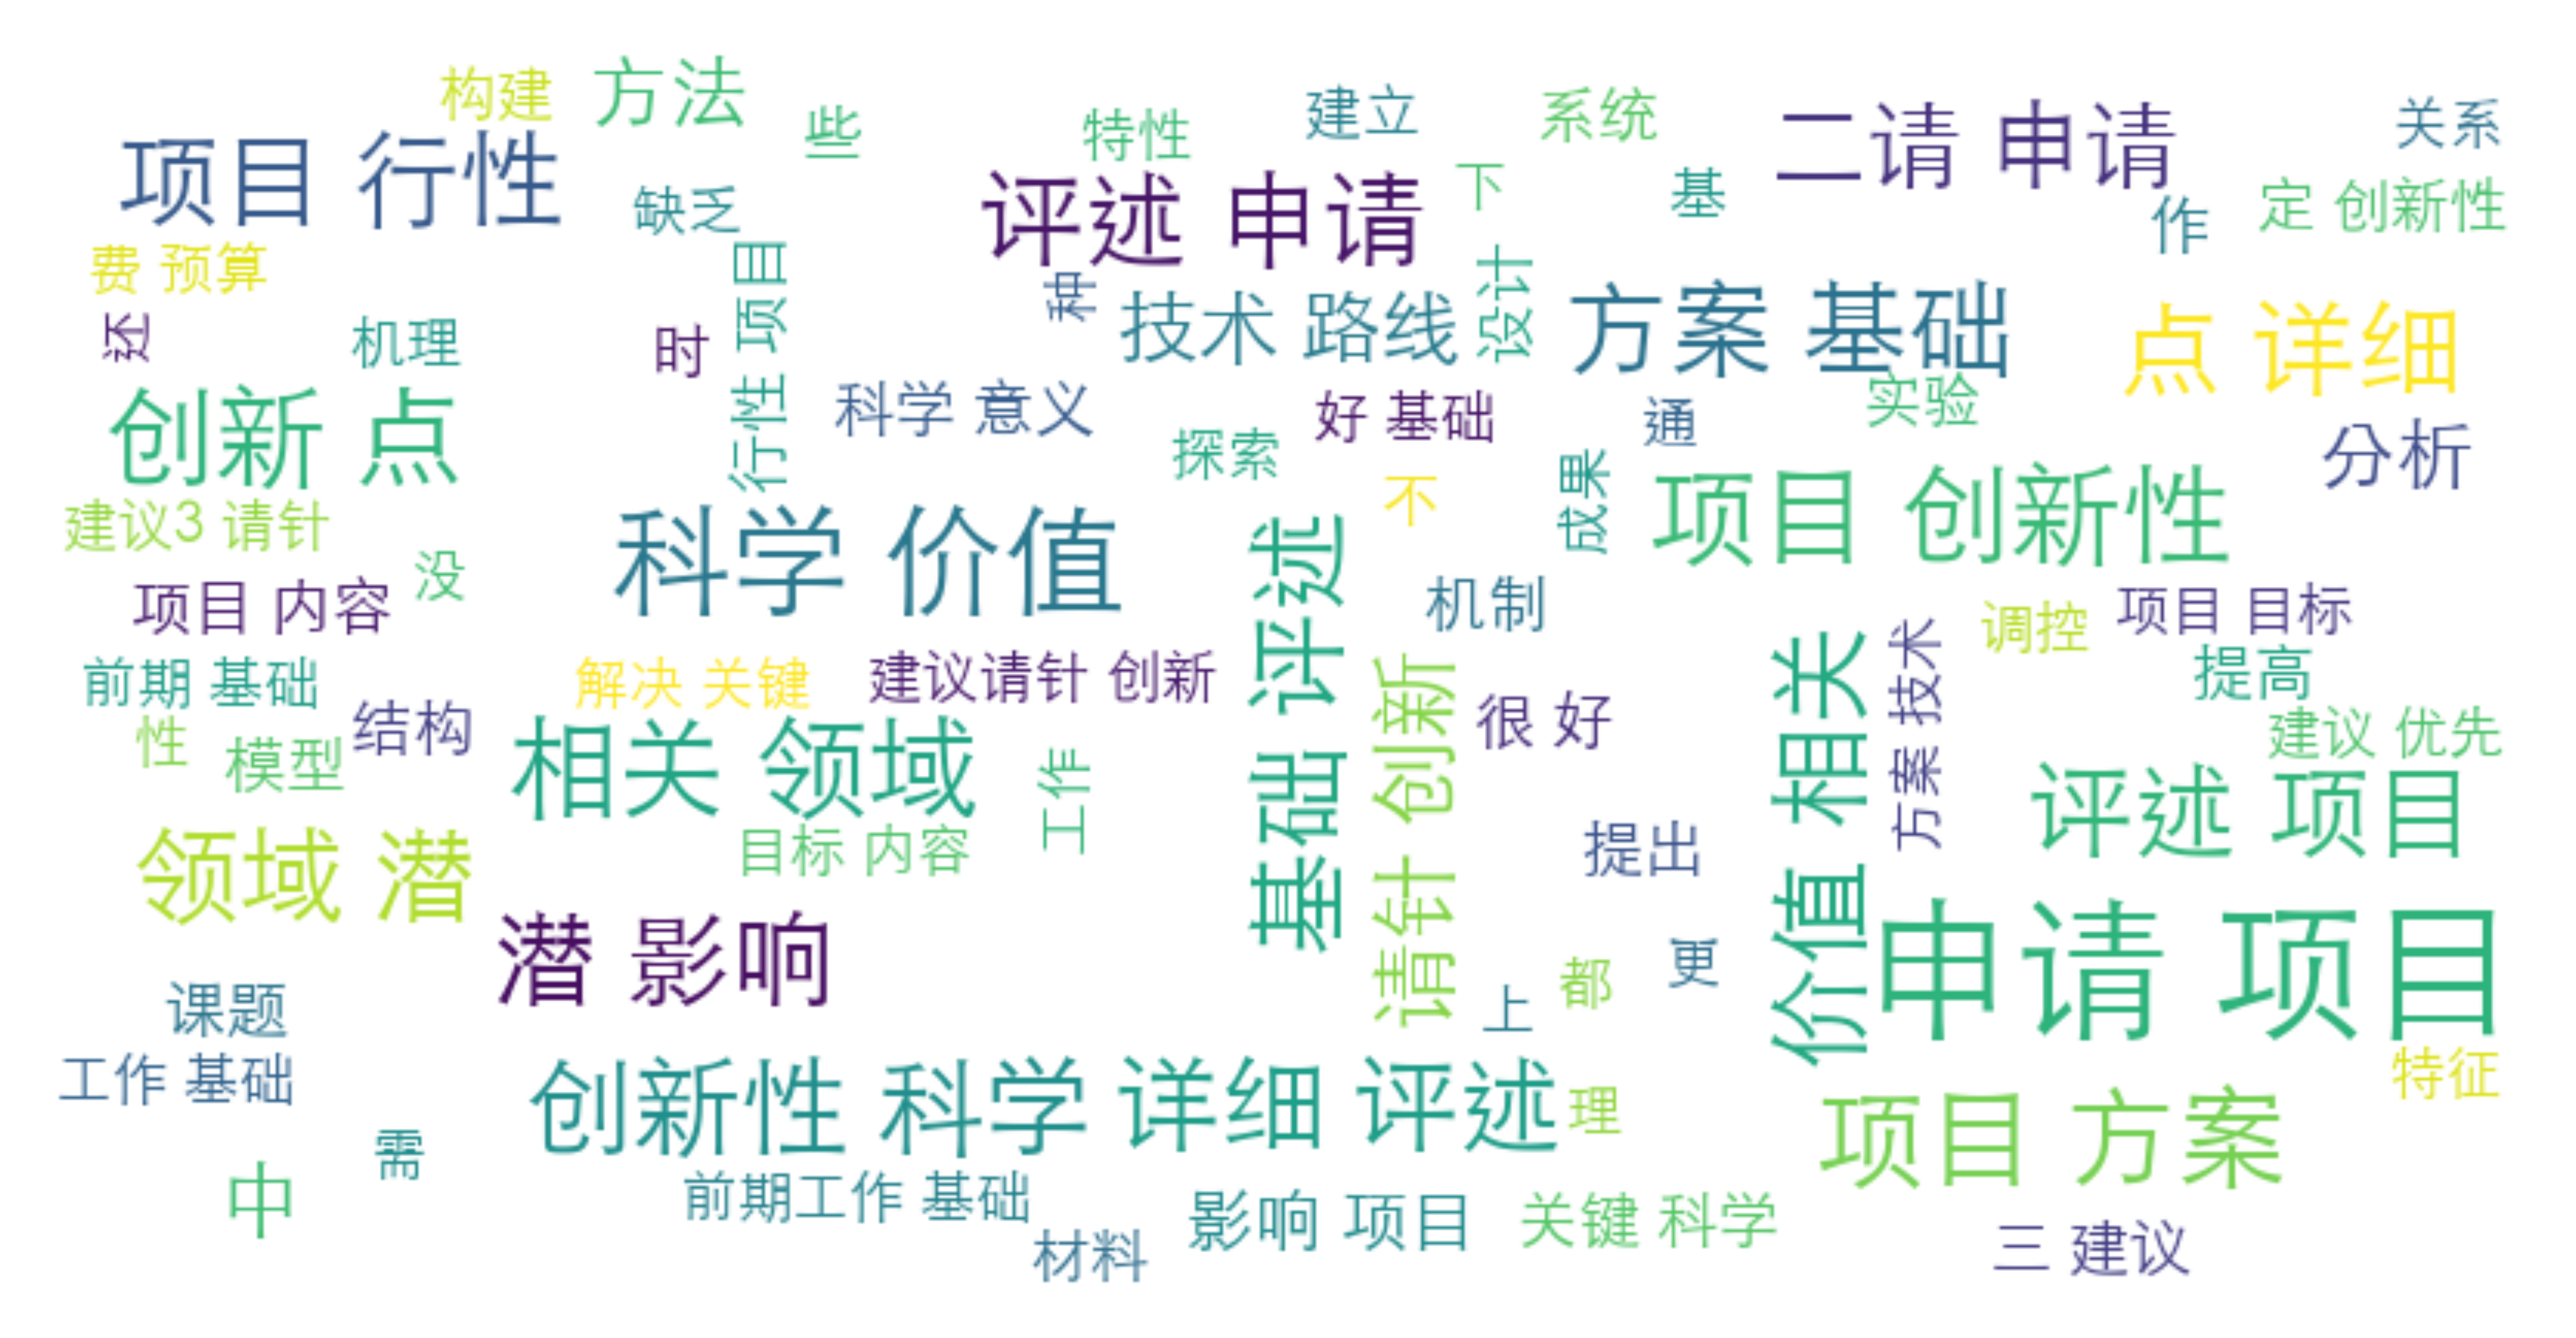

In [73]:
wordcloud = WordCloud(font_path = '/System/Library/Fonts/STHeiti Light.ttc',
            background_color="white",# 设置背景颜色
           max_words=80, # 词云显示的最大词数
           height=400, # 图片高度
           width=800, # 图片宽度
           max_font_size=50).generate(texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [74]:
vocab_size = 20000 #估计的词汇表大小，设置时要比真实的词汇量大，不然会产生不同单词分配了相同的索引。

# #通过索引对上面句子进行编码，one_hot编码映射到[1,vocab_size]，不包括0
# encoded_docs = [one_hot(s, vocab_size) for s in sentences]
# # 文本编码成数字格式并padding到相同长度，这里长度设置为4，在后面补0，这也是为什么前面one-hot不会映射到0的原因。

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(sentences)
encoded_docs = tokenizer.texts_to_sequences(sentences)
max_length = 200
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [75]:
len(padded_docs)

6873

In [76]:

X_train, X_val, y_train, y_val = train_test_split(padded_docs,labels, test_size=0.2)
# train_size = 2000
# X_train  = padded_docs[0:train_size,:]
# X_val  = padded_docs[train_size:,:]
# y_train  = labels[0:train_size]
# y_val    = labels[train_size:]

y_train = np.array(y_train)
y_val = np.array(y_val)

In [83]:
# # define the model
# model = Sequential()
# model.add(Embedding(vocab_size, 30, input_length=max_length))  # Embedding layer
# model.add(Bidirectional(LSTM(20)))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid',kernel_regularizer='l2'))
# model.compile(loss='binary_crossentropy',
#                      optimizer='adam', 
#                      metrics=['accuracy'])
# print(model.summary())

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))  # Increased embedding dimension
model.add(Bidirectional(LSTM(50, return_sequences=True)))  # Increased LSTM units and added return_sequences=True
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Bidirectional(LSTM(20)))  # Additional LSTM layer
model.add(Flatten())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1)))  # Increased regularization
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 50)           1000000   
                                                                 
 bidirectional_8 (Bidirecti  (None, 200, 100)          40400     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 200, 100)          0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 40)                19360     
 onal)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

### Test

In [84]:
matplotlib.style.use('bmh') 

In [87]:
history = model.fit(padded_docs, np.array(labels),validation_split = 0.6, epochs=20)


Epoch 1/20
86/86 [==============================] - 8s 94ms/step - loss: 0.0999 - accuracy: 0.9985 - val_loss: 0.5586 - val_accuracy: 0.8259
Epoch 2/20
86/86 [==============================] - 8s 92ms/step - loss: 0.1006 - accuracy: 0.9971 - val_loss: 0.5555 - val_accuracy: 0.8215
Epoch 3/20
86/86 [==============================] - 8s 93ms/step - loss: 0.1043 - accuracy: 0.9967 - val_loss: 0.5533 - val_accuracy: 0.8172
Epoch 4/20
86/86 [==============================] - 8s 92ms/step - loss: 0.0985 - accuracy: 0.9982 - val_loss: 0.5599 - val_accuracy: 0.8225
Epoch 5/20
86/86 [==============================] - 8s 93ms/step - loss: 0.0958 - accuracy: 0.9989 - val_loss: 0.5499 - val_accuracy: 0.8254
Epoch 6/20
86/86 [==============================] - 8s 93ms/step - loss: 0.1041 - accuracy: 0.9960 - val_loss: 0.5539 - val_accuracy: 0.8317
Epoch 7/20
86/86 [==============================] - 8s 94ms/step - loss: 0.0945 - accuracy: 0.9989 - val_loss: 0.5571 - val_accuracy: 0.8196
Epoch 8/20
86

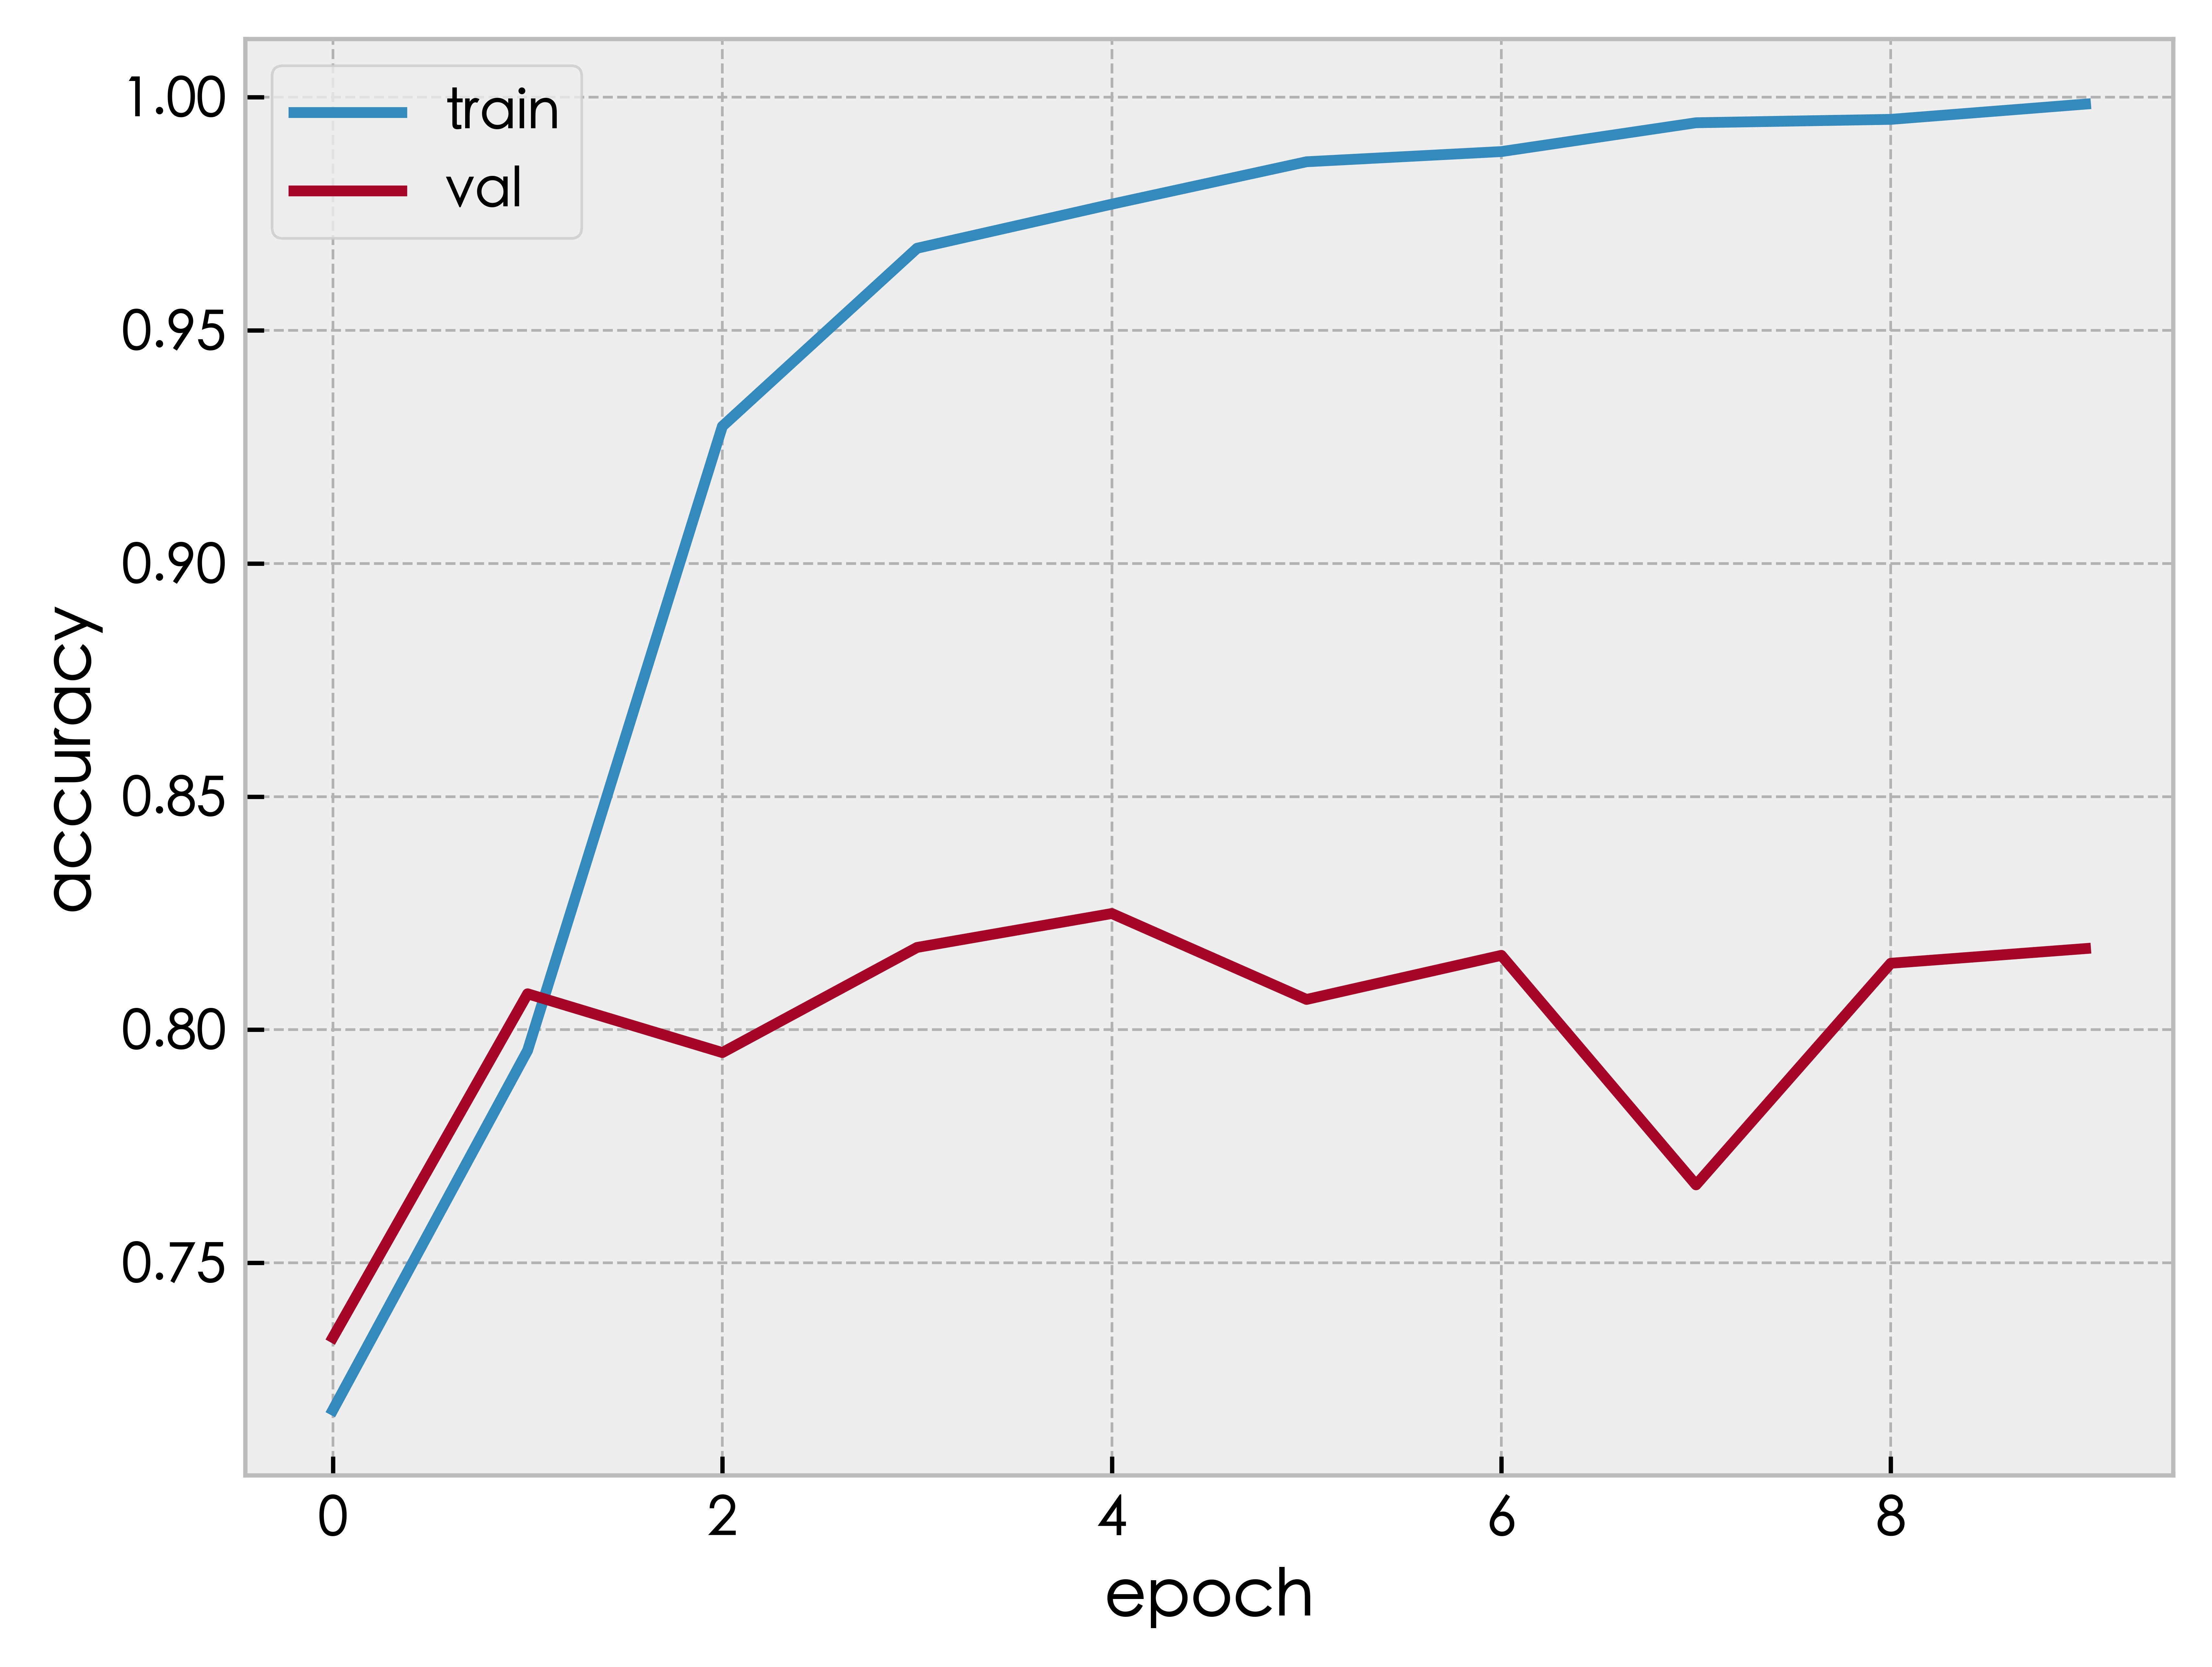

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('/Users/yansong/Nutstore Files/基金研究/graph_updated/model_accuracy.png')

In [36]:
senti_train = []
for i in X_train:
    input = np.expand_dims(i,axis=0)
    senti_train.append(model.predict(input))

senti_train_num = []
for i in range(len(senti_train)):
    senti_train_num.append(senti_train[i][0][0])

senti_train = pd.DataFrame(list(zip(senti_train_num, y_train)), columns =['Senti', 'Y'])
senti_train.groupby('Y').mean()

1/1 [==============================] - 0s 10ms/step


Senti
Y          
0  0.016017
1  0.946088

<Axes: ylabel='Density'>

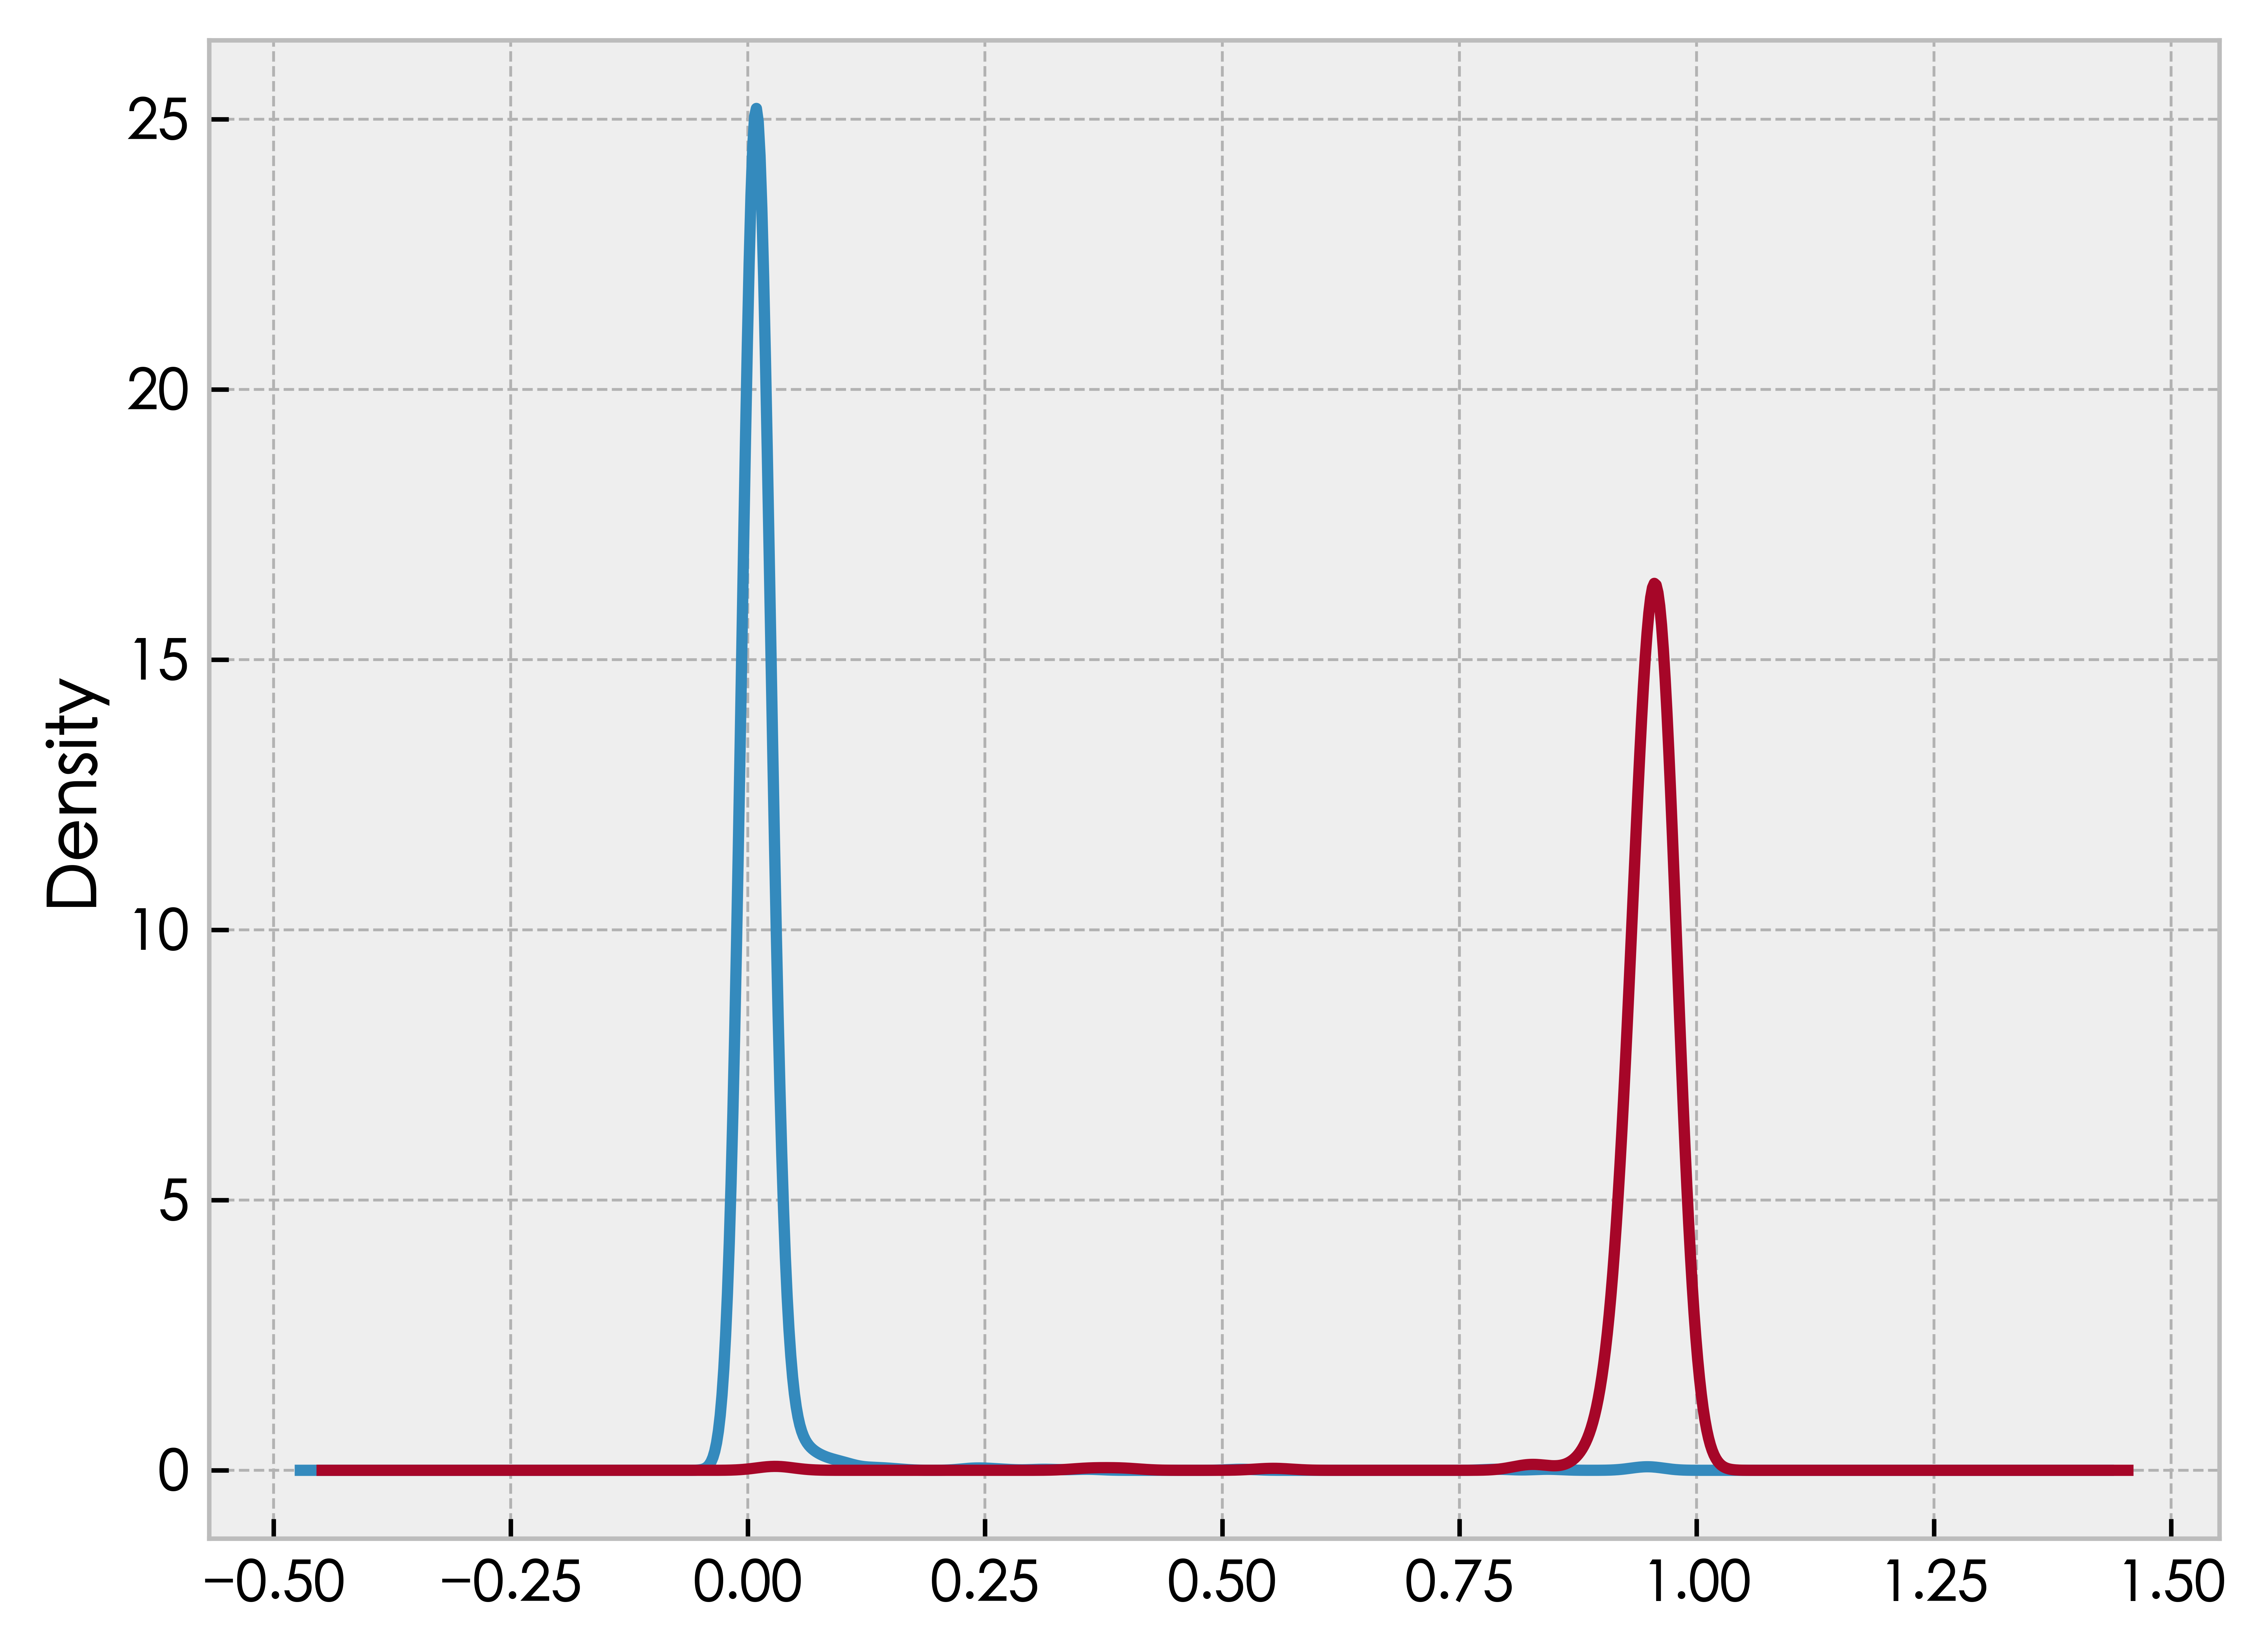

In [37]:
senti_train.loc[senti_train['Y']==0,'Senti'].plot.density()
senti_train.loc[senti_train['Y']==1,'Senti'].plot.density()

In [38]:
senti_val = []
for i in X_val:
    input = np.expand_dims(i,axis=0)
    senti_val.append(model.predict(input))
    
senti_val_num = []
for i in range(len(senti_val)):
    senti_val_num.append(senti_val[i][0][0])

senti_val = pd.DataFrame(list(zip(senti_val_num, y_val)), columns =['Senti', 'Y'])
senti_val.groupby('Y').mean()

1/1 [==============================] - 0s 11ms/step


Senti
Y          
0  0.099394
1  0.658046

<Axes: ylabel='Density'>

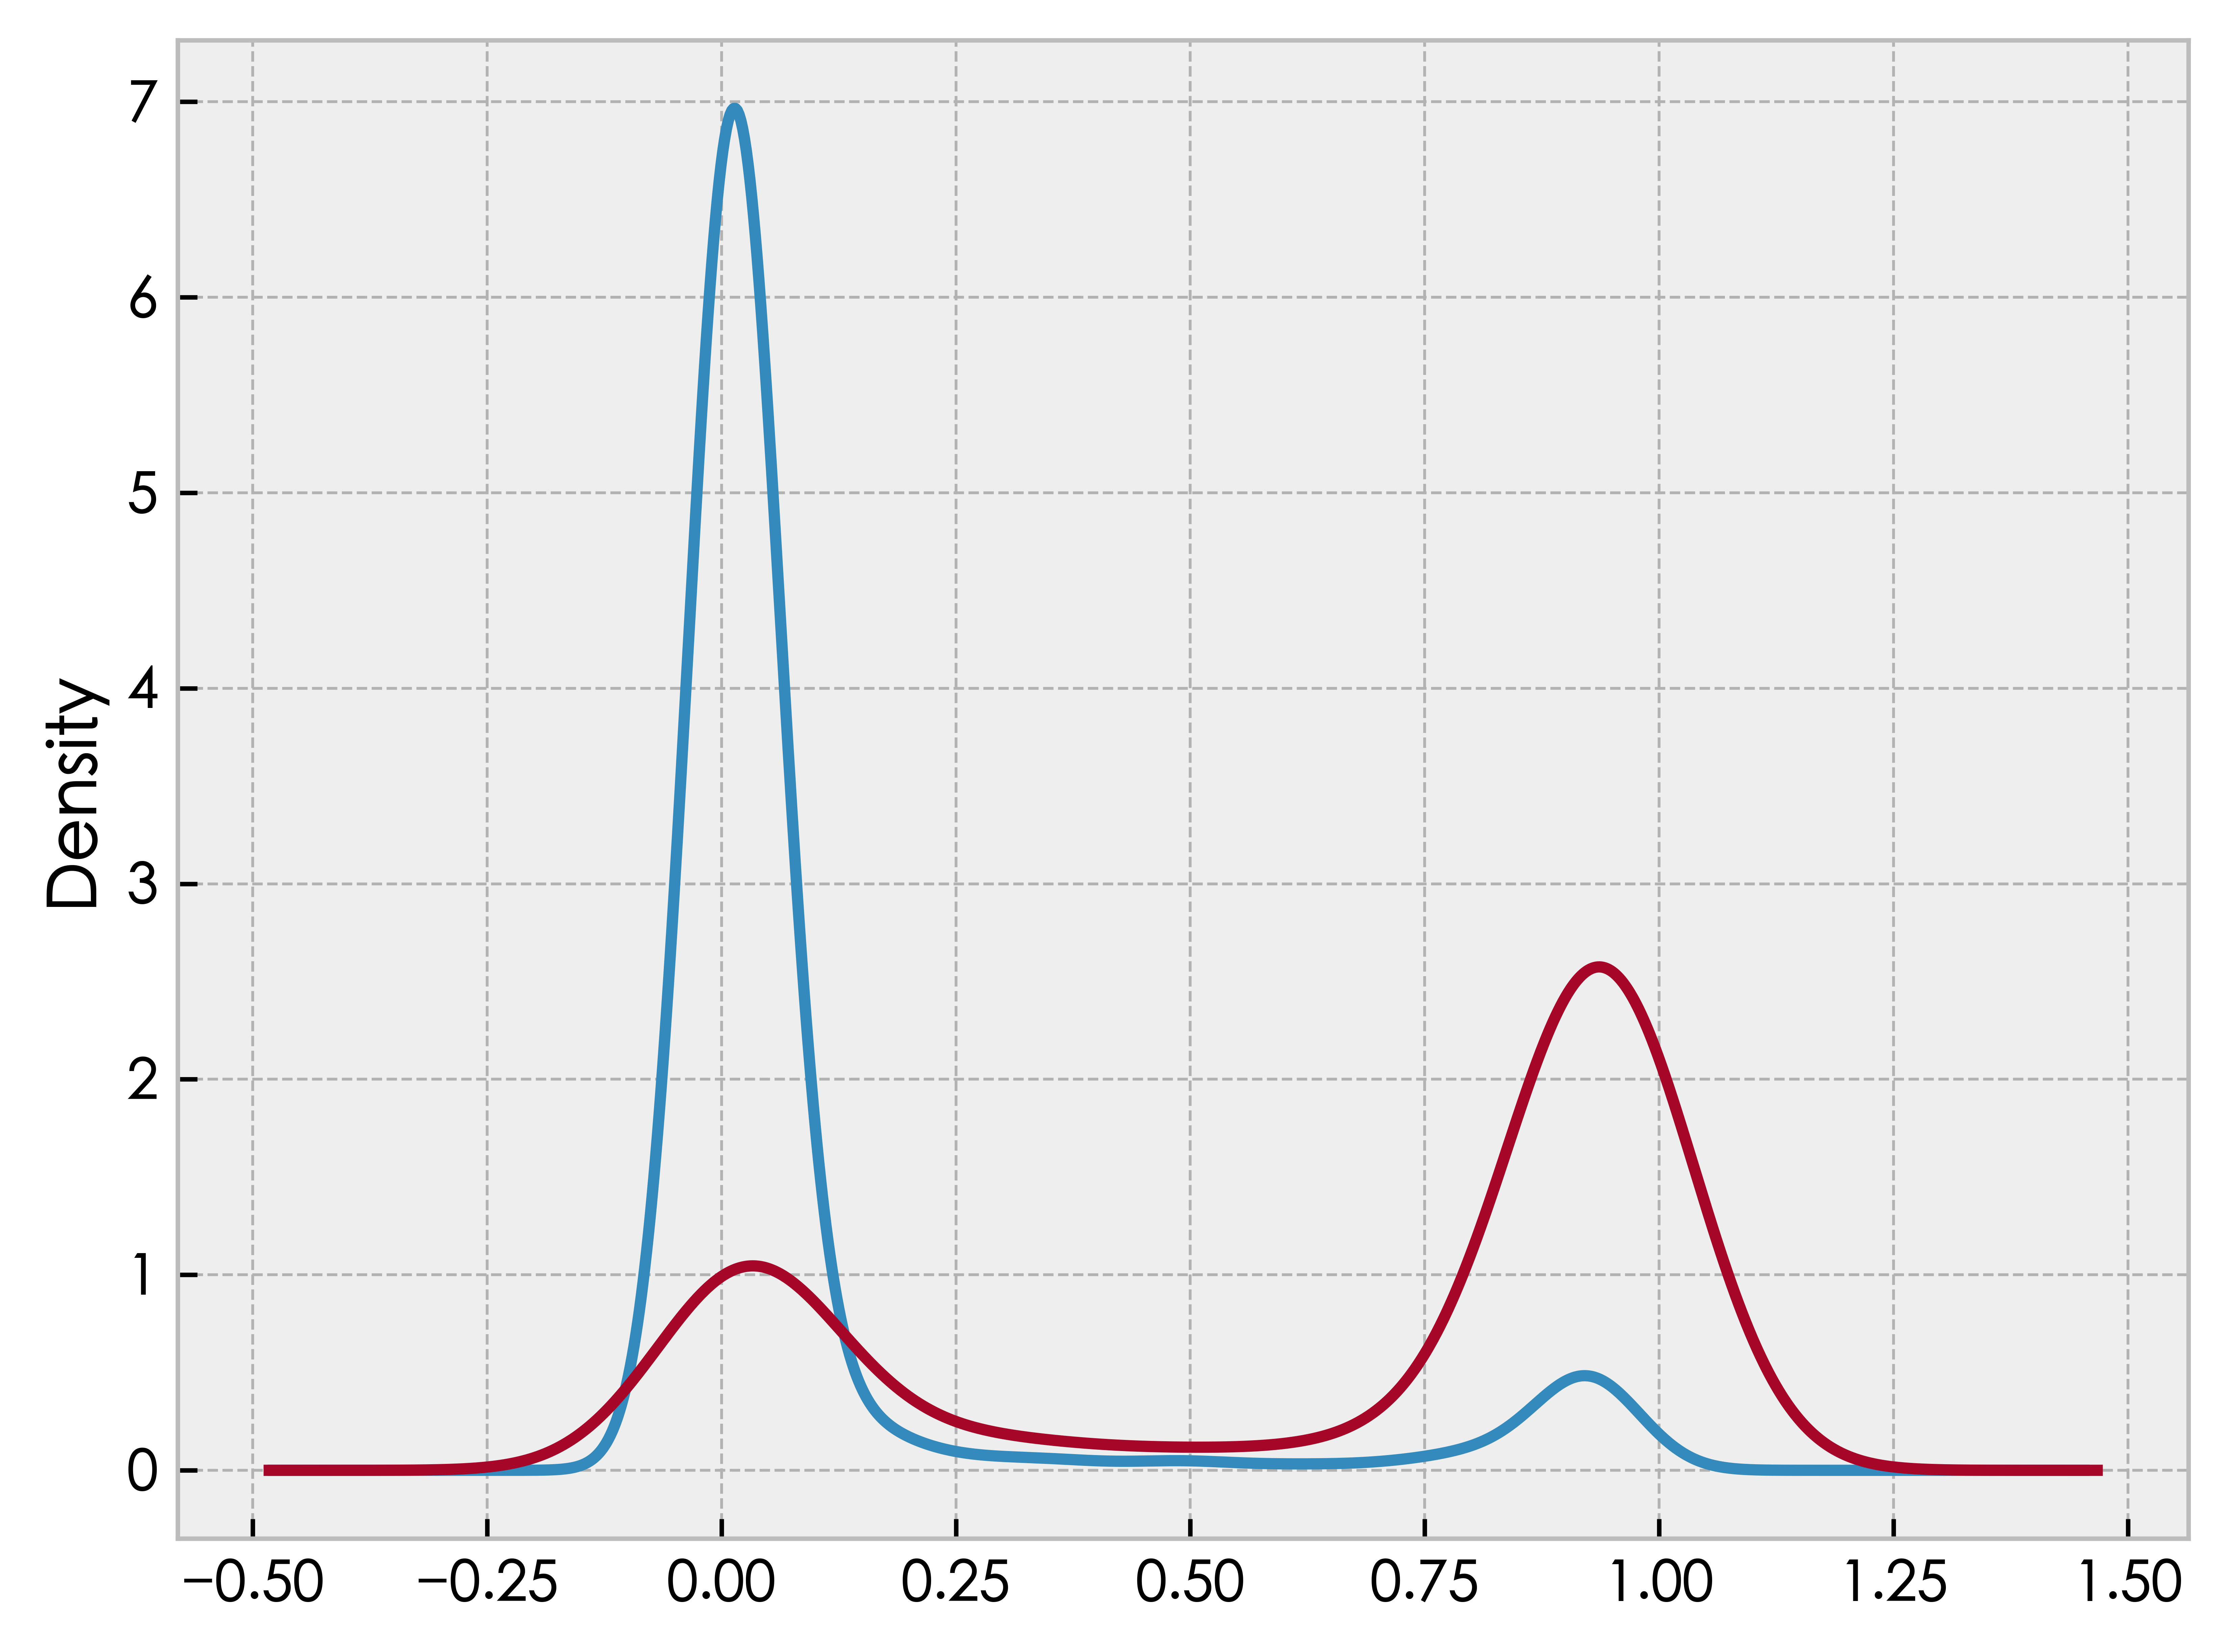

In [39]:
senti_val.loc[senti_val['Y']==0,'Senti'].plot.density()
senti_val.loc[senti_val['Y']==1,'Senti'].plot.density()

## Merging the sentiment back to original data

In [287]:
#senti = senti_train.append(senti_val)
senti = pd.concat([senti_train,senti_val],ignore_index=True)
senti.shape

(6873, 2)

In [291]:
senti = senti.reset_index().drop(['index'],axis=1)
df_json_sample = df_json_sample.reset_index().drop(['index'],axis=1)

In [292]:
senti

Senti  Y
0     0.011739  0
1     0.967371  1
2     0.027847  0
3     0.947921  1
4     0.015478  0
...        ... ..
6868  0.010817  0
6869  0.010993  0
6870  0.011849  0
6871  0.012920  0
6872  0.011789  0

[6873 rows x 2 columns]

In [312]:
id_1 = df_json_sample[df_json_sample.id==0].content

id_1

0       1>隐马尔科夫模型是一种非常重要的统计模型，在很多方面均有着应用，将其推广到高维的情形也有着...
1783    2>本项目研究大数据下隐马氏模型的统计推断, 有两个特点, 一是不同变量之间是相关的, 二是...
3566    3>该项目主要研究大数据下隐马尔科夫模型的统计推断问题，其研究内容包括：研究模型中多元随机过...
Name: content, dtype: object

In [311]:
id_1[1783]

'2>本项目研究大数据下隐马氏模型的统计推断, 有两个特点, 一是不同变量之间是相关的, 二是样本之间是相关的. 不过我觉得这里的样本也不算是大数据(336个样本), 同时使用EM算法中, 估计问题还是很复杂的. 不过, 主持人在这方面的积累还不是很够.\n'

In [318]:
senti.iloc[1783]

Senti    0.004443
Y        0.000000
Name: 1783, dtype: float64

In [320]:
id_2= df_json_sample[df_json_sample.id==1].content


In [323]:
id_2[1]

'1>本项目利用图论方法， 对符号网络的类簇结构进行研究，设计高效精确的层次聚类算法，对初始聚类结果进行二次递代，该项目的研究具有较强的理论意义和应用前景。 项目研究内容具体明确， 研究思路和措施可行。 申请者了解这方面的研究动态， 且已取得了一定的前期研究成果。可以考虑资助。\n'

In [322]:
senti.iloc[1]

Senti    0.967371
Y        1.000000
Name: 1, dtype: float64

In [294]:
senti_id = df_json_sample.join(senti)[['id','Senti']]

In [296]:
senti_id

id     Senti
0        0  0.011739
1        1  0.967371
2        2  0.027847
3        3  0.947921
4        4  0.015478
...    ...       ...
6868  1779  0.010817
6869  1780  0.010993
6870  1786  0.011849
6871  1787  0.012920
6872  1791  0.011789

[6873 rows x 2 columns]

In [174]:
senti_id_avg = senti_id.groupby('id')['Senti'].agg('mean')

In [175]:
senti_id_avg.head(10)

id
0    0.025292
1    0.653840
2    0.019648
3    0.658549
4    0.189122
5    0.011477
6    0.701035
7    0.310747
8    0.009972
9    0.021638
Name: Senti, dtype: float32

In [176]:
df_json_full.head(1)

申请人  申请部门                                                意见1  \
0  王效强  威海校区  1>隐马尔科夫模型是一种非常重要的统计模型，在很多方面均有着应用，将其推广到高维的情形也有着...   

                                                 意见2  \
0  2>本项目研究大数据下隐马氏模型的统计推断, 有两个特点, 一是不同变量之间是相关的, 二是...   

                                                 意见3   意见4   意见5  立项    年份  id  
0  3>该项目主要研究大数据下隐马尔科夫模型的统计推断问题，其研究内容包括：研究模型中多元随机过...  None  None   0  2014   0

In [177]:
df_final = df_json_full.merge(senti_id_avg, how='inner', on='id')

In [178]:
df_final.sort_values(['id'],inplace=True)

In [179]:
df_final.groupby('立项')['Senti'].agg('mean')

立项
0    0.068048
1    0.766698
Name: Senti, dtype: float32

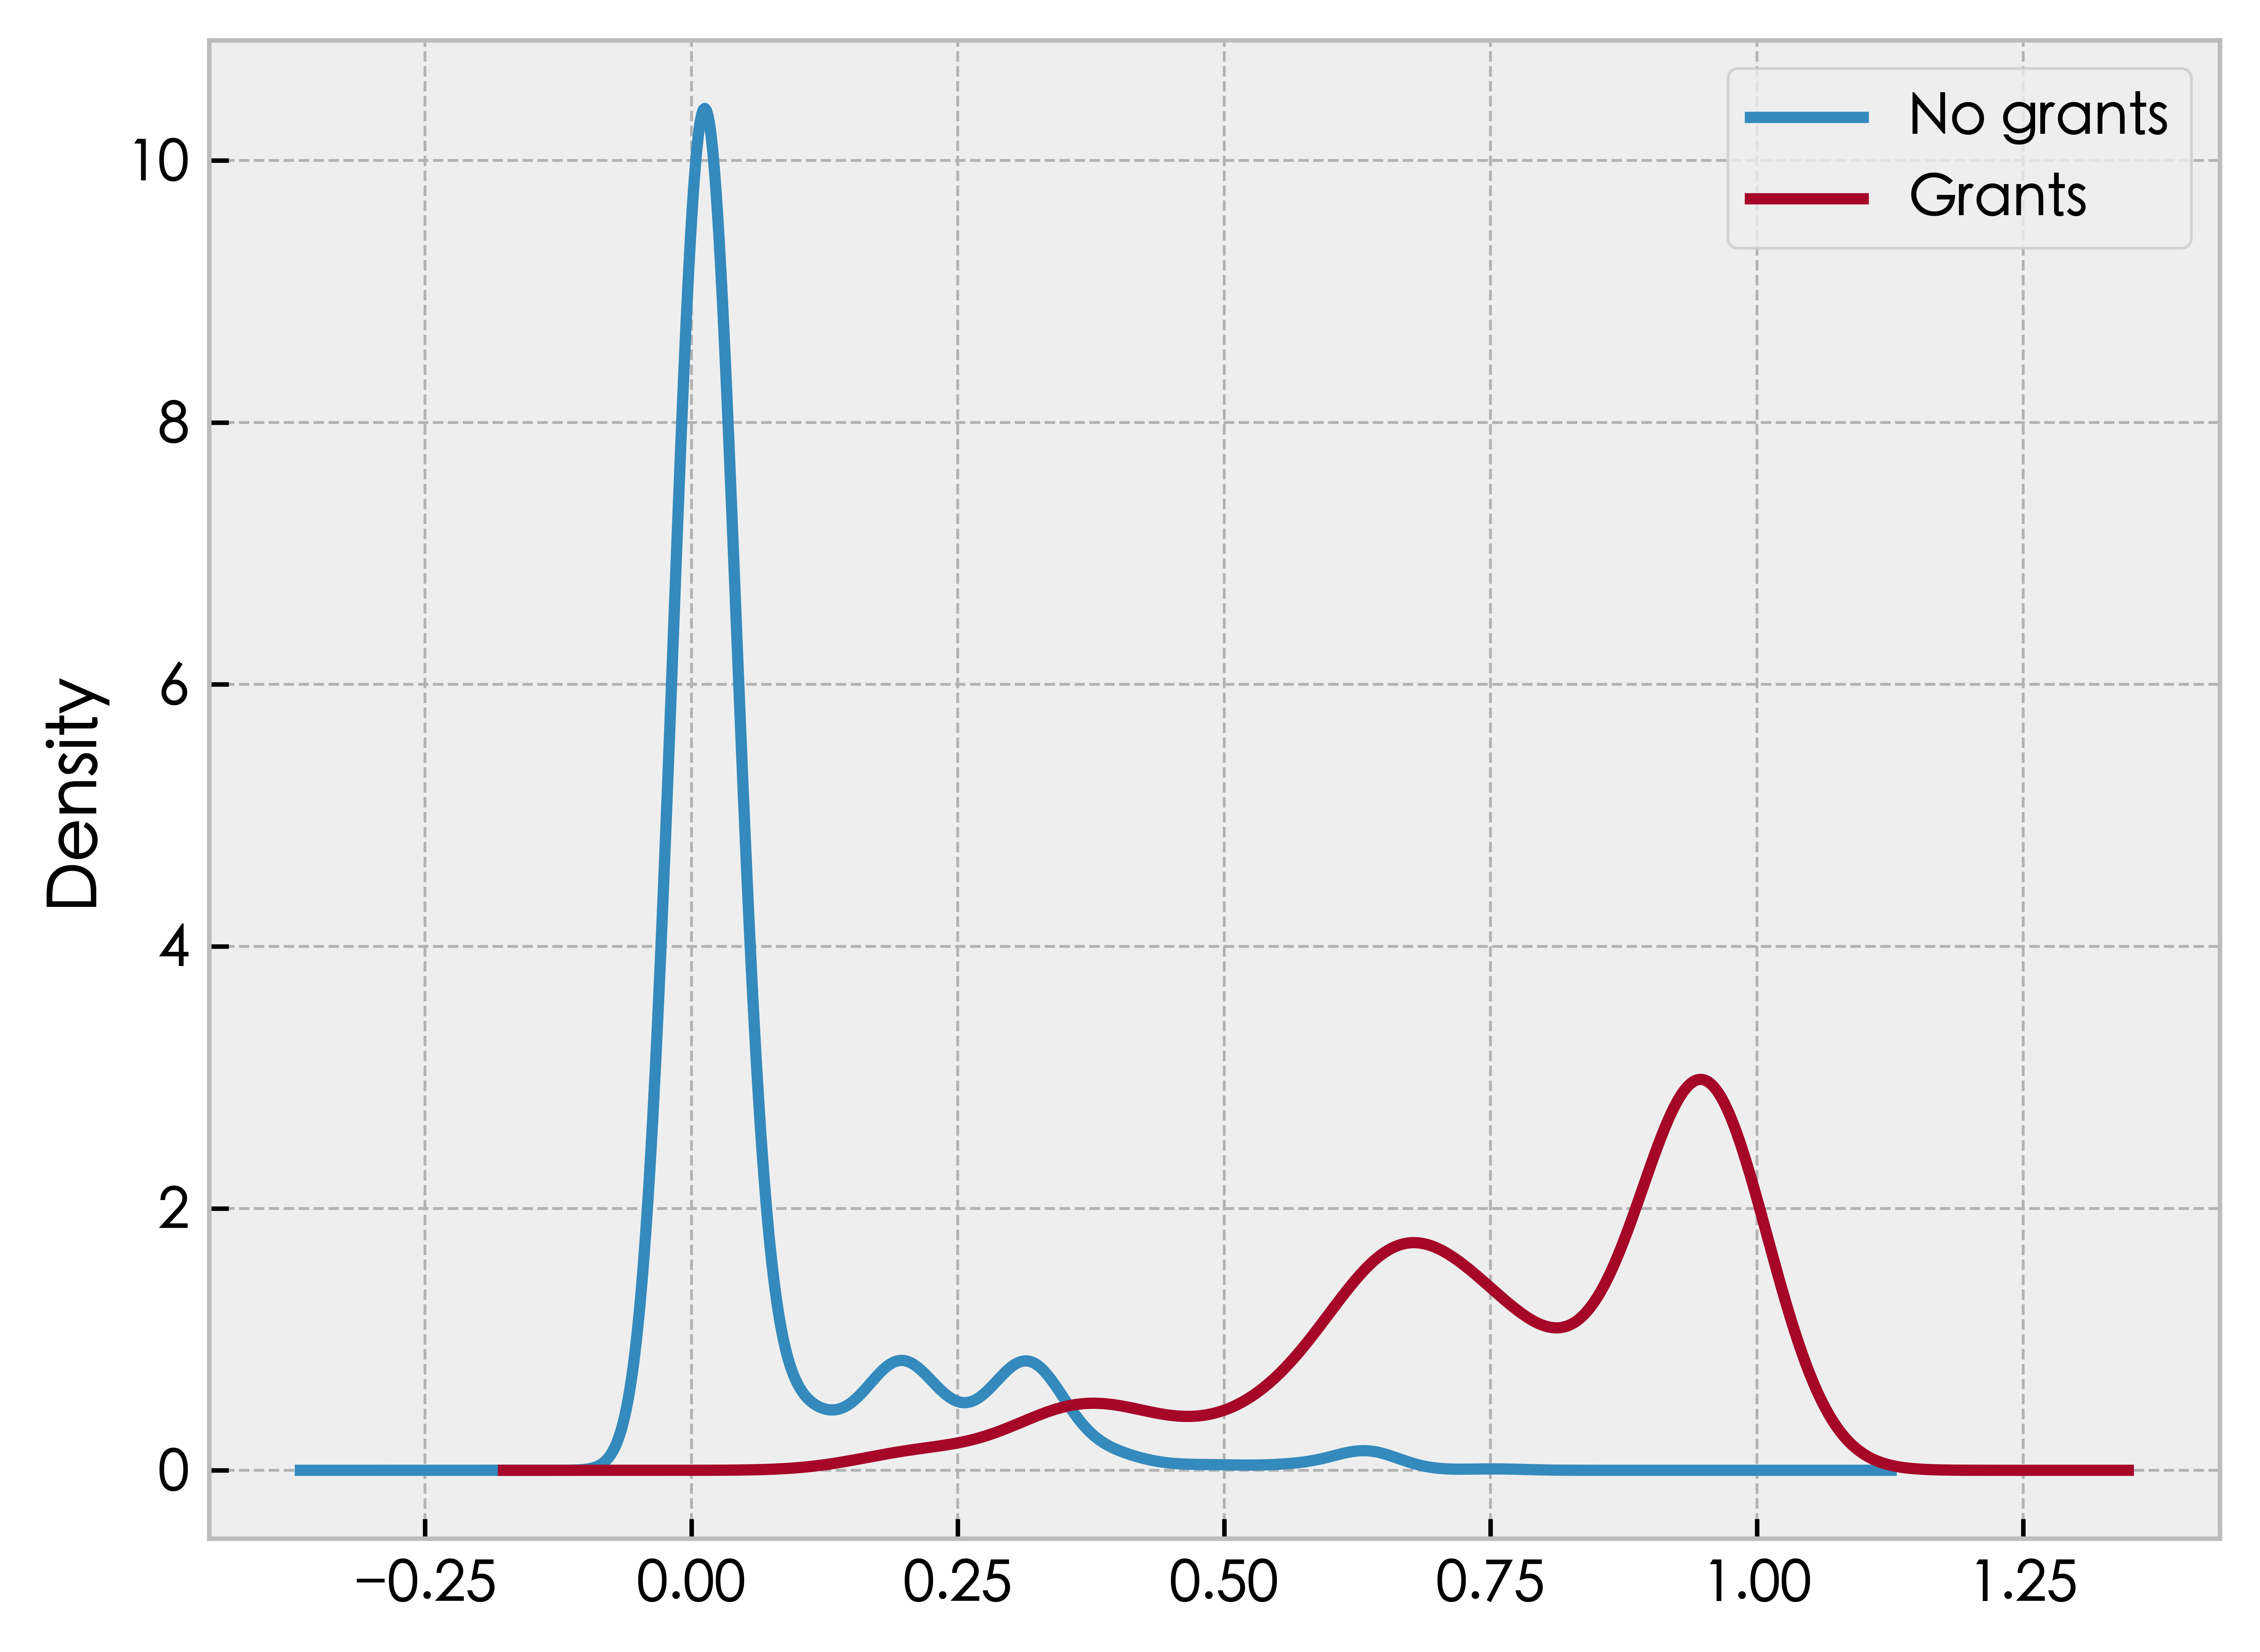

In [180]:
fig, ax = plt.subplots()
df_final.loc[df_final['立项']==0,'Senti'].plot.density(label='No grants')
df_final.loc[df_final['立项']==1,'Senti'].plot.density(label='Grants')
leg = ax.legend();

In [181]:
rd_negative = (df_final['立项']==0) & (df_final['Senti']>=0.4) & (df_final['Senti']<=0.6)
df_rd_neg = df_final[rd_negative]
rd_positive = (df_final['立项']==1) & (df_final['Senti']>=0.4) & (df_final['Senti']<=0.6)
df_rd_positive = df_final[rd_positive]

In [182]:
df_rd_neg.shape

(12, 11)

In [183]:
df_rd_positive.shape

(47, 11)

In [184]:
df_final.head(1)

申请人  申请部门                                                意见1  \
0  王效强  威海校区  1>隐马尔科夫模型是一种非常重要的统计模型，在很多方面均有着应用，将其推广到高维的情形也有着...   

                                                 意见2  \
0  2>本项目研究大数据下隐马氏模型的统计推断, 有两个特点, 一是不同变量之间是相关的, 二是...   

                                                 意见3   意见4   意见5  立项    年份  \
0  3>该项目主要研究大数据下隐马尔科夫模型的统计推断问题，其研究内容包括：研究模型中多元随机过...  None  None   0  2014   

   id     Senti  
0   0  0.025292

In [185]:
df_final_output = df_final[['申请人','申请部门','年份','立项','Senti']]
df_final_output.to_csv("/Users/yansong/Nutstore Files/基金研究/data/2013--2022面青/qn_senti.csv",
                             encoding='utf_8_sig')

In [186]:
X1 = np.array(df_final['Senti'])
X2 = np.square(X1)
X3 = X1<0.5
X3 = X3.astype(int)
X4 = X1*X2
X5 = X1<0.4
X = pd.DataFrame([X1,X2,X3,X4,X5])
X = X.T
y = np.array(df_final['立项'])
DF = X
DF.rename(columns={0: 'Senti', 1:'Senti Squared',2:'Below_cutoff',3:'Senti Cubic',4:'Alter_cutoff'},inplace=True)

In [187]:
DF['Grants'] = y

In [188]:
DF

Senti Senti Squared Below_cutoff Senti Cubic Alter_cutoff  Grants
0     0.025292       0.00064            1    0.000016         True       0
1      0.65384      0.427506            0     0.27952        False       1
2     0.019648      0.000386            1    0.000008         True       0
3     0.658549      0.433687            0    0.285604        False       1
4     0.189122      0.035767            1    0.006764         True       0
...        ...           ...          ...         ...          ...     ...
1778  0.011726      0.000138            1    0.000002         True       0
1779  0.629727      0.396556            0    0.249722        False       0
1780   0.00772       0.00006            1         0.0         True       0
1781  0.007997      0.000064            1    0.000001         True       0
1782  0.009734      0.000095            1    0.000001         True       0

[1783 rows x 6 columns]

In [189]:
y_var = 'Grants'
X_vars = ['Senti', 'Senti Squared','Below_cutoff']

results = mt.reg(
    DF,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
#    addcons=True
)
results

Dependent variable:	Grants
N:			1783
R-squared:		0.8224
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
Senti          1.374 0.052 26.638 0.000  1.273   1.475
Senti Squared -0.279 0.061 -4.595 0.000 -0.398  -0.160
Below_cutoff  -0.050 0.006 -8.523 0.000 -0.061  -0.038

In [190]:
F1, pF1 = results.Ftest(['Senti', 'Senti Squared','Below_cutoff'])
print(F1)
print(pF1)


4054.120698915069
1.1102230246251565e-16


In [191]:
y_var = 'Grants'
X_vars = ['Senti', 'Senti Squared','Alter_cutoff']

results = mt.reg(
    DF,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
#    addcons=True
)
results

Dependent variable:	Grants
N:			1783
R-squared:		0.8239
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
Senti          1.373 0.050 27.192 0.000  1.274   1.472
Senti Squared -0.279 0.059 -4.684 0.000 -0.395  -0.162
Alter_cutoff  -0.054 0.006 -9.354 0.000 -0.065  -0.043

In [192]:
y_var = 'Grants'
X_vars = ['Senti','Below_cutoff']

results = mt.reg(
    DF,                     # DataFrame
    y_var,                      # Dependent var (string)
    X_vars,                      # Independent var(s) (string or list of strings)
#    addcons=True
)
results

Dependent variable:	Grants
N:			1783
R-squared:		0.8203
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se       t   p>t CI_low CI_high
Senti         1.142 0.010 109.250 0.000  1.121   1.162
Below_cutoff -0.038 0.005  -7.212 0.000 -0.049  -0.028

In [226]:
bin_list = [x / 100.0 for x in range(0, 100, 2)]

In [227]:
DF['binned']=pd.cut(x=DF['Senti'], bins=bin_list)


In [228]:
df_mean = DF.groupby('binned')['Grants'].mean()
df_binned = pd.DataFrame(df_mean).reset_index()


In [237]:
df_binned.head()

binned  Grants
0   (0.0, 0.02]     0.0
1  (0.02, 0.04]     0.0
2  (0.04, 0.06]     0.0
3  (0.06, 0.08]     0.0
4   (0.08, 0.1]     0.0

In [247]:
def interval_right(a):
    # print(type(a))
    b = a.right
    # print(b)
    return b
    
df_binned['interval'] = df_binned['binned'].apply(interval_right)


In [248]:
df_binned.head()

binned  Grants interval
0   (0.0, 0.02]     0.0     0.02
1  (0.02, 0.04]     0.0     0.04
2  (0.04, 0.06]     0.0     0.06
3  (0.06, 0.08]     0.0     0.08
4   (0.08, 0.1]     0.0     0.10

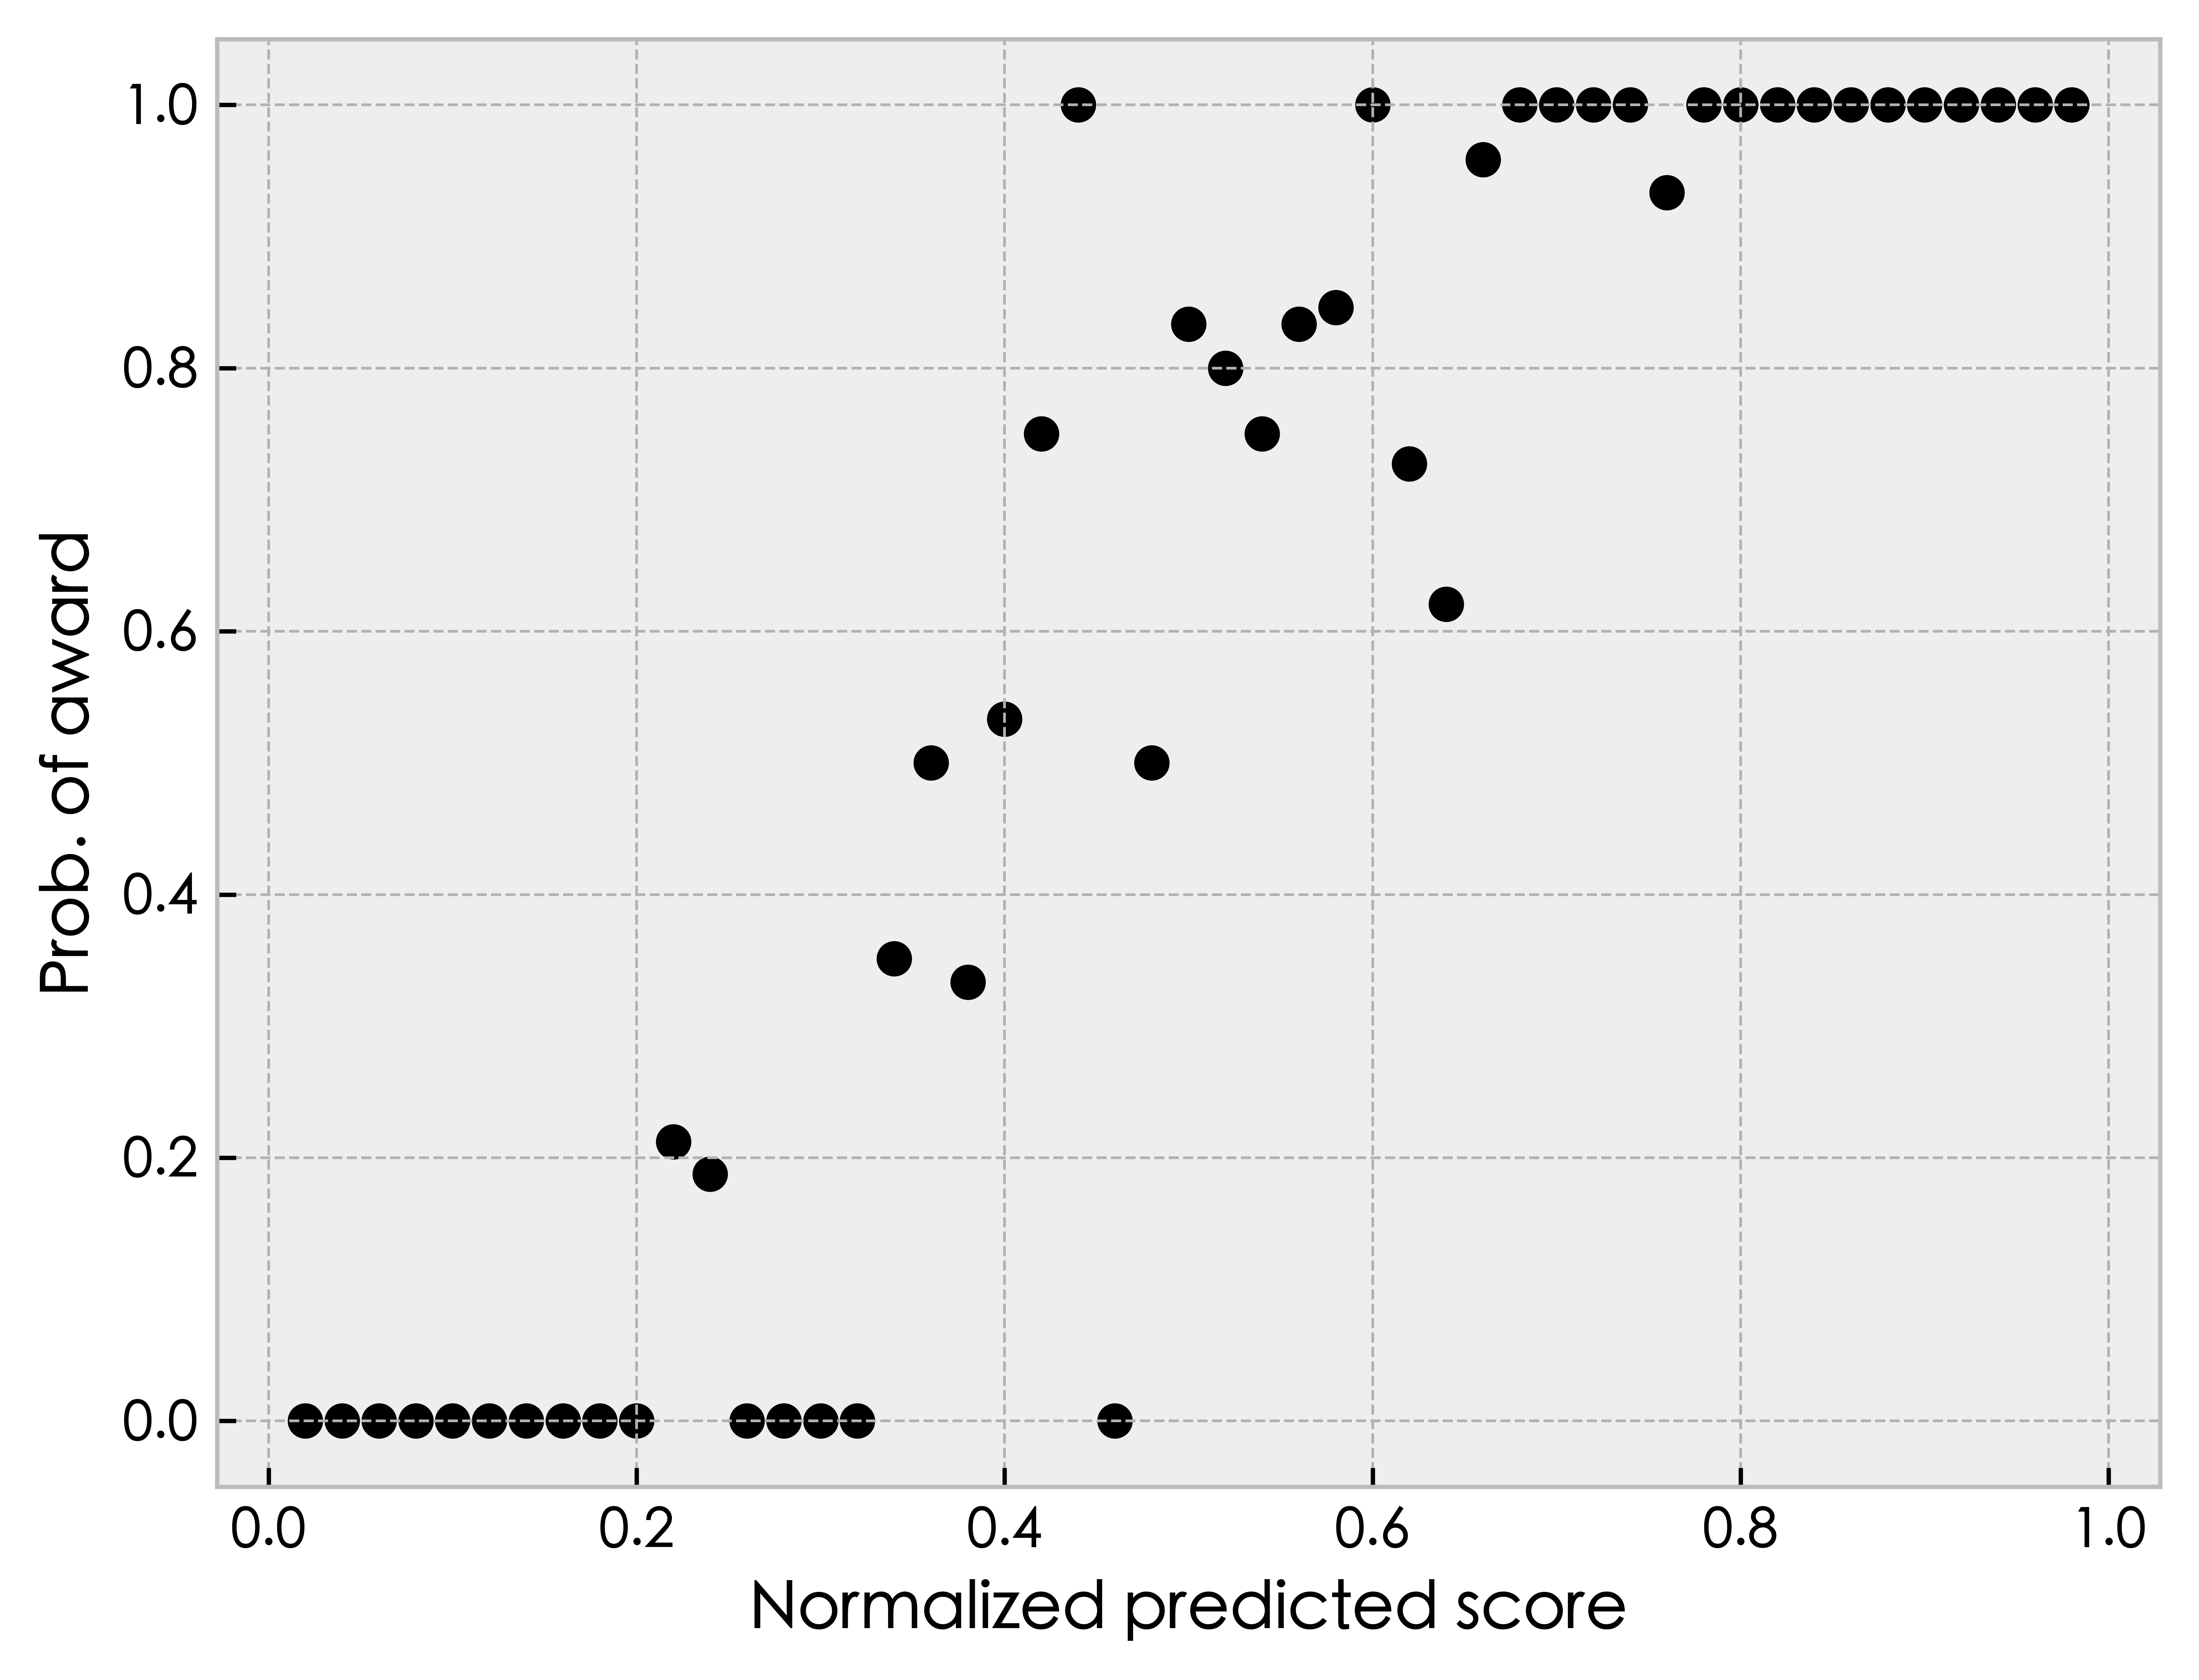

In [250]:
# plt.scatter(df_binned['bins'], df_binned['Grants'], color="black")
# plt.ylabel('Probability of funded')
# plt.xlabel('Average Sentiment')
# plt.show()
plt.scatter(df_binned['interval'], df_binned['Grants'], color="black")
plt.ylabel('Prob. of award')
plt.xlabel('Normalized predicted score')
plt.savefig('/Users/yansong/Nutstore Files/基金研究/graph_updated/model_funding.png')
plt.show()

### Learning curve

In [251]:
df_final = df_final.sort_values(['申请人','年份'])
df_final['constant'] = 1
df_final['申请次数'] = df_final.groupby(['申请人']).年份.transform('count')
df_final['申请第几次'] = df_final.groupby(['申请人']).constant.transform('cumsum')

df_final.groupby(['申请次数']).Senti.mean()

申请次数
1    0.399002
2    0.224071
3    0.138421
4    0.098219
5    0.102933
6    0.099295
7    0.009896
Name: Senti, dtype: float32

### 三次

In [252]:
mask_3 = df_final['申请次数'] ==3
df_final[mask_3].groupby(['申请第几次']).Senti.mean()

申请第几次
1    0.065931
2    0.076545
3    0.272787
Name: Senti, dtype: float32

### 四次

In [253]:
mask_4 = df_final['申请次数'] ==4
df_final[mask_4].groupby(['申请第几次']).Senti.mean()

申请第几次
1    0.041381
2    0.024962
3    0.054977
4    0.271557
Name: Senti, dtype: float32

### 五次

In [254]:
mask_5 = df_final['申请次数'] ==5
df_final[mask_5].groupby(['申请第几次']).Senti.mean()

申请第几次
1    0.031155
2    0.048528
3    0.084041
4    0.120175
5    0.230766
Name: Senti, dtype: float32

### 六次

In [255]:
mask_6 = df_final['申请次数'] ==6
df_final[mask_6].groupby(['申请第几次']).Senti.mean()

申请第几次
1    0.013508
2    0.045797
3    0.061071
4    0.035630
5    0.169089
6    0.270678
Name: Senti, dtype: float32

### 七次

In [256]:
mask_7 = df_final['申请次数'] ==7
df_final[mask_7].groupby(['申请第几次']).Senti.mean()

申请第几次
1    0.013127
2    0.011250
3    0.009263
4    0.009136
5    0.011125
6    0.007661
7    0.007712
Name: Senti, dtype: float32